<a href="https://colab.research.google.com/github/PepiMartin28/Average-IQ/blob/main/Average_IQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all the modules

In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

#Upload the kaggle file

In [ ]:
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


#Download the csv files

In [ ]:
!kaggle datasets download -d mlippo/average-global-iq-per-country-with-other-stats

  0% 0.00/5.83k [00:00<?, ?B/s]
100% 5.83k/5.83k [00:00<00:00, 15.2MB/s]


#Unzip the files

In [ ]:
!unzip average-global-iq-per-country-with-other-stats.zip

Archive:  average-global-iq-per-country-with-other-stats.zip
  inflating: avgIQpercountry.csv     
  inflating: iq_classification.csv   


In [ ]:
df = pd.read_csv("/content/avgIQpercountry.csv")

In [ ]:
for column in df.columns:
  if df[column].isna().any():
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df.head()

,Rank,Country,Average IQ,Continent,Literacy Rate,Nobel Prices,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,29,0.925000,13.400000,42274.000000,123294513
1,2,Taiwan,106.47,Asia,0.96,4,0.724123,9.028492,20811.798883,10143543
2,3,Singapore,105.89,Asia,0.97,0,0.939000,11.900000,90919.000000,6014723
3,4,Hong Kong,105.37,Asia,0.94,1,0.952000,12.200000,62607.000000,7491609
4,5,China,104.10,Asia,0.96,8,0.768000,7.600000,17504.000000,1425671352


#We remove all non-numeric characters from the "Population - 2023" column to cast it to int

In [ ]:
df['Population - 2023'] = df['Population - 2023'].apply(lambda x: re.sub("\D", "", str(x)))

In [ ]:
df['Population - 2023'] = df['Population - 2023'].apply(lambda x: int(x))

In [ ]:
df['Continent'] = df['Continent'].apply(lambda x: 'America' if 'America' in x else x)
df['Continent'] = df['Continent'].apply(lambda x: 'Asia' if 'Asia' in x else x)

#We show the distribution of every continent

<function matplotlib.pyplot.show(close=None, block=None)>

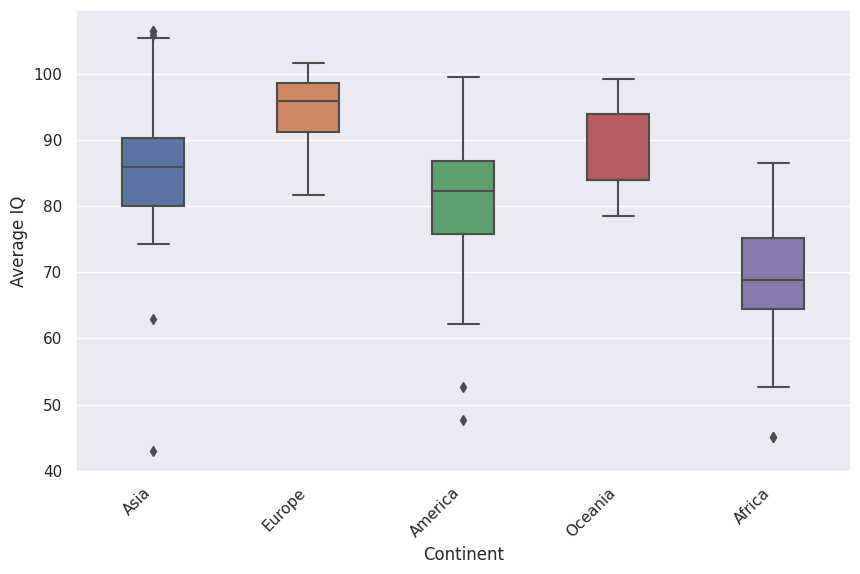

In [ ]:
ax = sns.boxplot(x='Continent', y='Average IQ', data=df, dodge=True, width=0.4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show

#We show the max, the min and the mean of every continent

<function matplotlib.pyplot.show(close=None, block=None)>

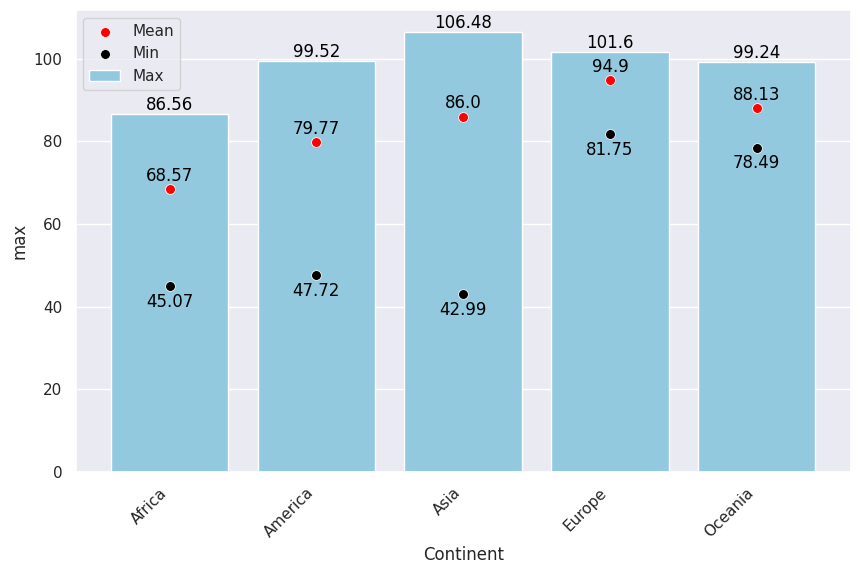

In [ ]:
df_aggregated = df.groupby('Continent')['Average IQ'].agg(['max', 'min', 'mean']).reset_index()

sns.set(rc={'figure.figsize':(10,6)})

ax = sns.barplot(x='Continent', y='max', color='skyblue', data=df_aggregated, label='Max')

sns.scatterplot(x='Continent', y='mean', data=df_aggregated, color='red', s=50, label='Mean')

sns.scatterplot(x='Continent', y='min', data=df_aggregated, color='black', s=50, label='Min')

for index, value in enumerate(df_aggregated['max']):
    ax.text(index, value, str(value), color='black', ha='center', va='bottom')

for index, value in enumerate(df_aggregated['mean'].round(2)):
    ax.text(index, value+1, str(value), color='black', ha='center', va='bottom')

for index, value in enumerate(df_aggregated['min']):
    ax.text(index, value-6, str(value), color='black', ha='center', va='bottom')

plt.legend()

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.show

#Looking for correlation between the average IQ and the rest of the numeric columns

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number])
df1 = numerical_columns.corr(method='pearson')
df1['Average IQ'].iloc[2:]

Literacy Rate                     0.634726
Nobel Prices                      0.205644
HDI (2021)                        0.727628
Mean years of schooling - 2021    0.679454
 GNI - 2021                       0.611466
Population - 2023                 0.067167
Name: Average IQ, dtype: float64